In [68]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
%matplotlib inline

* Contains 10 categories of images
 * airplane
 * automobile
 * bird
 * cat
 * deer
 * dog
 * frog
 * horse
 * ship
 * truck

## 1. load dataset

In [69]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print('x_train shape is ',x_train.shape)
print('x_test shape is ',x_test.shape)

x_train shape is  (50000, 32, 32, 3)
x_test shape is  (10000, 32, 32, 3)


## 2.examine our dataset

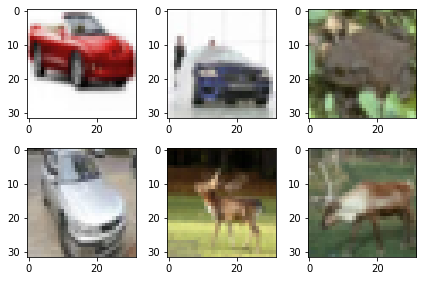

In [70]:
# look some random image with matplotlib
rows = 2
cols = 3

fig,ax = plt.subplots(rows,cols)
for i in range(rows):
    for j in range(cols):
        random_number = np.random.randint(0,len(x_train))
        ax[i][j].imshow(x_train[random_number])
plt.tight_layout()

## 3. prepare our dataset

In [71]:
#change shape format for keras lib
# row_img = x_train[0].shape[0]
# col_img = x_train[0].shape[1]
# channel_img = x_train[0].shape[2]
# x_train = x_train.reshape(len(x_train),row_img,col_img,channel_img)
# x_test = x_test.reshape(len(x_test),row_img,col_img,channel_img)
#change type to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# input_shape = (row_img,col_img,channel_img)
# normalize image
x_train /= 255
x_test /= 255

In [72]:
# change y label to category 
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_of_class = y_train.shape[1]
print('number of class is ',num_of_class)

number of class is  10


## 4. Create our model by keras

In [73]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.optimizers import RMSprop,Adam

model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:],activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_of_class,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer= Adam(0.0001),
             metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 64)         

## 5. Training model

In [74]:
batch_size = 32
epochs = 10

history = model.fit(x_train,y_train
                    ,batch_size=batch_size
                    ,epochs=epochs
                    ,verbose=1,
                   validation_data=(x_test,y_test),shuffle=True)

score = model.evaluate(x_test,y_test)
print('loss validation is %f and accuracy validation is %f'%(score[0],score[1]))

Epoch 1/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7396 - accuracy: 0.3605 - val_loss: 1.4321 - val_accuracy: 0.4796
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4265 - accuracy: 0.4823 - val_loss: 1.3364 - val_accuracy: 0.5315
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3006 - accuracy: 0.5351 - val_loss: 1.1741 - val_accuracy: 0.5894
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2039 - accuracy: 0.5751 - val_loss: 1.1010 - val_accuracy: 0.6138
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1241 - accuracy: 0.6016 - val_loss: 1.0195 - val_accuracy: 0.6436
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0603 - accuracy: 0.6268 - val_loss: 0.9670 - val_accuracy: 0.6676
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0074 - accuracy: 0.6485 - val_loss: 0.9349 - val_ac

## 6. Look perfomance of model

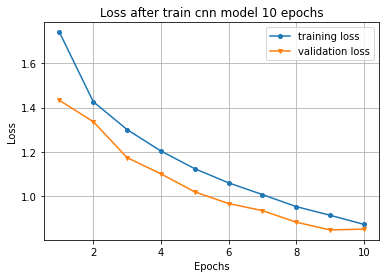

In [75]:
hist_dict = history.history
loss_values = hist_dict['loss']
val_loss_values = hist_dict['val_loss']

epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,marker='o',markersize=4,label='training loss')
plt.plot(epochs,val_loss_values,marker='v',markersize=4,label='validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss after train cnn model 10 epochs')
plt.grid()
plt.legend()

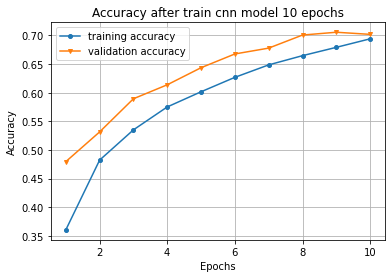

In [76]:
acc_values = hist_dict['accuracy']
val_acc_values = hist_dict['val_accuracy']

epochs = range(1,len(acc_values)+1)
plt.plot(epochs,acc_values,marker='o',markersize=4,label='training accuracy')
plt.plot(epochs,val_acc_values,marker='v',markersize=4,label='validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy after train cnn model 10 epochs')
plt.grid()
plt.legend()

## 7. Save model

In [77]:
model.save('CIFAR10_classifier_simpleCNN.h5')

## 8. Test our model with test/unseen data

In [78]:
def print_class(class_index):
    class_ = ''
    if class_index == 0:
        class_ = 'airplane'
    elif class_index == 1:
        class_ = 'automobile'
    elif class_index == 2:
        class_ = 'bird'
    elif class_index == 3:
        class_ = 'cat'
    elif class_index == 4:
        class_ = 'deer'
    elif class_index == 5:
        class_ = 'dog'
    elif class_index == 6:
        class_ = 'frog'
    elif class_index == 7:
        class_ = 'horse'
    elif class_index == 8:
        class_ = 'ship'
    elif class_index == 9:
        class_ ='truck'
        
    return  class_
        

['frog', 'frog', 'deer', 'deer', 'airplane', 'dog', 'ship', 'automobile', 'bird', 'cat']


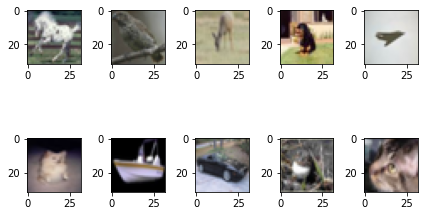

In [79]:
from keras.models import load_model

model = load_model('CIFAR10_classifier_simpleCNN.h5')

rows = 2
cols = 5
predict_class = []
fig ,ax = plt.subplots(rows,cols)
for i in range(rows):
    for j in range(cols):
        random_number = np.random.randint(0,len(x_test))
        input_img = x_test[random_number].reshape(1,32,32,3)
        predict_class.append(print_class(model.predict_classes(input_img,1,verbose=0)[0]))
        ax[i][j].imshow(x_test[random_number])
plt.tight_layout()
print(predict_class)

In [80]:
# test with cv2 lib 
import cv2
def draw_test(image,predict_class):
    image = image.reshape(image.shape[1:])
    image = cv2.resize(image,None,fx=4,fy=4,interpolation=cv2.INTER_CUBIC)
    expand_image = cv2.copyMakeBorder(image,0,0,0
                                      ,image.shape[1]*2,
                                      cv2.BORDER_CONSTANT,
                                      value=[0,0,0])
    
    expand_image = cv2.putText(expand_image,predict_class,
                (image.shape[1]+image.shape[1]//2,image.shape[0]//2),
               cv2.FONT_HERSHEY_COMPLEX,2,(255,0,0),1)
    cv2.imshow('prediction',expand_image)
    

In [81]:
for i in range(10):
    random_number = np.random.randint(0,len(x_test))
    input_img = x_test[random_number].reshape(1,32,32,3)
    predict_class_str = print_class(model.predict_classes(input_img,1,verbose=0)[0])
    draw_test(input_img,predict_class_str)
    cv2.waitKey(0)
cv2.destroyAllWindows()

## 9. plot structure of model (if you want)

In [ ]:
from keras.utils import plot_model
from matplotlib.pyplot import mpim

plot_model(model,to_file='model_plot.png',
          show_shapes=True,
          show_layer_names=True)

